<xarray.Dataset>
Dimensions:         (year: 9, lat: 13, lon: 21)
Coordinates:
  * lat             (lat) float32 24.0 23.75 23.5 23.25 ... 21.5 21.25 21.0
  * lon             (lon) float32 85.0 85.25 85.5 85.75 ... 89.5 89.75 90.0
  * year            (year) int64 2015 2016 2017 2018 2019 2020 2021 2022 2023
Data variables:
    forecast_hour   (year) timedelta64[ns] 06:00:00 06:00:00 ... 06:00:00
    ALBDO_L1_Avg_1  (year, lat, lon) float32 12.86 13.59 14.85 ... 6.626 6.553
Attributes:
    Creation date and time:  2023-09-12 05:13:29 -0600
    Conventions:             CF-1.5
    Creator:                 NCAR - CISL RDA (dattore)


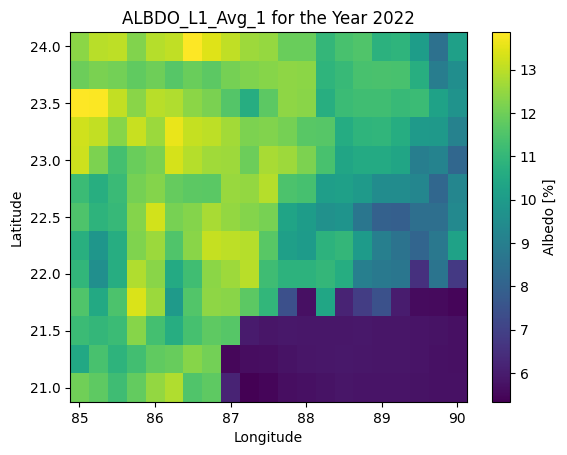

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
# Load the merged NetCDF file
merged_data = xr.open_dataset('Albedo.nc')

# Extract the year information from the time dimension
merged_data['year'] = merged_data['time'].dt.year

# Group by year and calculate the mean for each variable
mean_data = merged_data.groupby('year').mean(dim='time')

# Close the original dataset
merged_data.close()

# Print the mean_data dataset (optional)
print(mean_data)

# Plot a variable, e.g., albedo, for a specific year
selected_year = 2022
variable_to_plot = 'ALBDO_L1_Avg_1'

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the variable for the selected year
mean_data[variable_to_plot].sel(year=selected_year).plot(ax=ax)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'{variable_to_plot} for the Year {selected_year}')

# Show the plot
plt.show()

# Close the mean dataset
mean_data.close()


NameError: name 'ccrs' is not defined

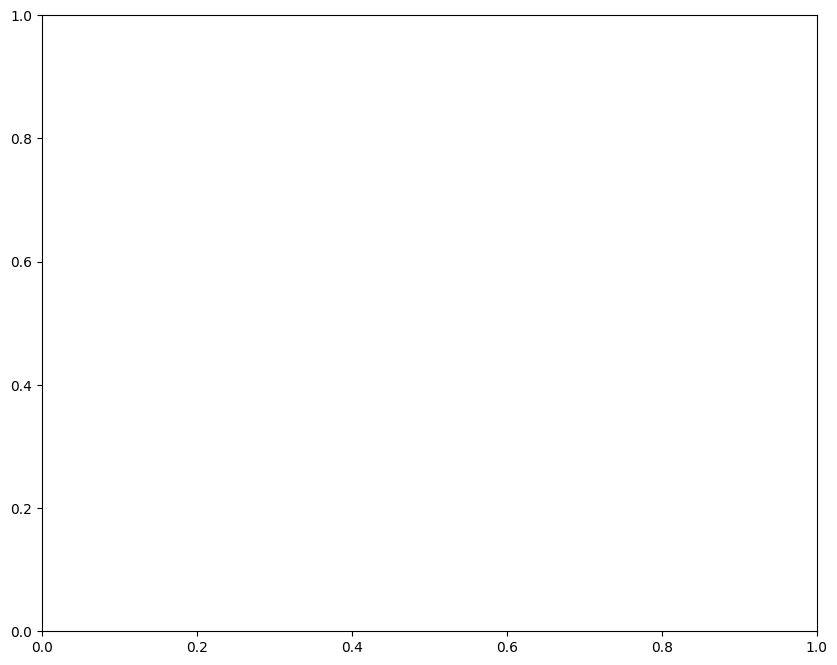

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load the merged NetCDF file
merged_data = xr.open_dataset('Albedo.nc')

# Extract the albedo variable
albedo = merged_data['ALBDO_L1_Avg_1']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Set up the map projection
projection = ccrs.PlateCarree()

# Add coastlines and other map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Define the update function for the animation
def update(frame):
    ax.clear()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    ax.add_feature(cfeature.RIVERS)
    albedo[frame].plot(ax=ax, transform=projection, cmap='viridis', vmin=0, vmax=1)
    


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(albedo['time']), interval=200, repeat=False)

# Save the animation to a GIF file
ani.save('albedo_animation.gif', writer='imagemagick', fps=2)

# Close the dataset
merged_data.close()

# Show the plot (optional)
plt.show()
